In [1]:
import gurobi_manager

gurobi_manager.options = {
    'WLSACCESSID': '023dd6c9-cfb8-4f1b-a33c-77f3682d6631',
    'WLSSECRET': 'd7d09c3c-39c0-42dd-9f4d-4fae36615968',
    'LICENSEID': 2589125
}
gurobi_manager.options = {
    'WLSACCESSID': None,
    'WLSSECRET': None,
    'LICENSEID': None
}

In [2]:
import networkx as nx
from torch import tensor

from graph import create_graph

n = 10
incidence_matriz = tensor([[0, 0, 0, 1, 1, 3, 4, 4, 4, 5, 5, 5, 7, 9, 9, 9, 2, 7, 6, 0, 8, 1],
        [1, 4, 9, 0, 5, 4, 0, 3, 9, 1, 7, 9, 5, 0, 4, 5, 7, 2, 0, 6, 1, 8]])
# incidence_matriz = create_graph(n)

g_n = nx.from_edgelist(incidence_matriz.T.tolist())

In [3]:
from graph import milp_solve_mds

x = tensor([[0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.]])
s = {i for i, v in enumerate(x) if v == 1}
# s = milp_solve_mds(incidence_matriz, n)
print(s)

{3, 5}


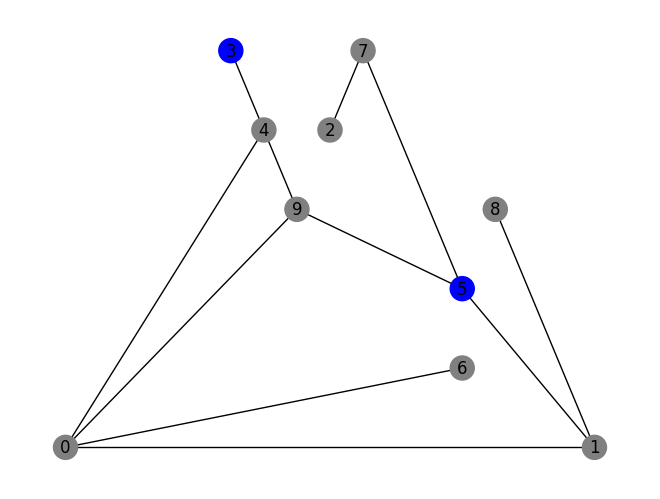

In [4]:
try:
    layout = nx.planar_layout(g_n)
except:
    layout = nx.drawing.spring_layout(g_n)

node_colors = ['blue' if n in s else 'gray' for n in g_n]
nx.draw(g_n, with_labels=True, node_color=node_colors, pos=layout)